In [1]:
import pandas as pd

url = 'https://drive.google.com/file/d/1HG-7kV4FdujQvl4DSlvdQTob7h7kbWiF/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands_df = pd.read_csv(path)

url = 'https://drive.google.com/file/d/1LurSby3fKpPDGhyD_H5qFJnyZDgfbh0f/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines_df = pd.read_csv(path)

url = 'https://drive.google.com/file/d/1oHwUzohlDAT161sfzjX5WVQfIZ1ZLQRd/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders_df = pd.read_csv(path)

url = 'https://drive.google.com/file/d/1kzMc8pis_-W4NQ_IRUpKO2ssZmY3MMgI/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products_df = pd.read_csv(path)

In [7]:
products_df.info()
orderlines_df.info()
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10579 entries, 0 to 10578
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sku              10579 non-null  object 
 1   name             10579 non-null  object 
 2   desc             10579 non-null  object 
 3   price            10579 non-null  float64
 4   promo_price      10579 non-null  float64
 5   in_stock         10579 non-null  int64  
 6   type             9683 non-null   float64
 7   category         10579 non-null  object 
 8   discount_status  10579 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 744.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   order_id          293983 non-null  int64  

In [12]:
orderlines_df['date'] = pd.to_datetime(orderlines_df['date'])

merged_data = pd.merge(orderlines_df, products_df, on='sku', how='left')

# Most sold categories (by quantity)
most_sold_categories = (
    merged_data.groupby('category')['product_quantity']
    .sum()
    .reset_index()
    .sort_values(by='product_quantity', ascending=False)
    .head(10)
)

# Categories generating the most revenue
merged_data['revenue'] = merged_data['product_quantity'] * merged_data['unit_price']
category_revenue = (
    merged_data.groupby('category')['revenue']
    .sum()
    .reset_index()
    .sort_values(by='revenue', ascending=False)
    .head(10)
)

# Print results
print("Most Sold Categories (by Quantity):")
print(most_sold_categories)

print("\nCategories Generating the Most Revenue:")
print(category_revenue)

Most Sold Categories (by Quantity):
                  category  product_quantity
7   Data Storage Solutions             57654
24     Protectors & Covers             37153
15        MacBooks & iMACs             31758
5        Cables & Adapters             27941
33                 iPhones             21009
3                Applecare             20515
8       Device Accessories             16658
25             RAM Modules             13856
11              Headphones              9659
18       Mouse & Trackpads              8732

Categories Generating the Most Revenue:
                           category      revenue
15                 MacBooks & iMACs  73239918.23
33                          iPhones  15846657.76
7            Data Storage Solutions  12646690.75
32                            iPads   4754408.10
17              Monitors & Displays   3274578.18
3                         Applecare   2716957.02
10  Graphical Tablets & Accessories   2395239.72
8                Device Accessories 

<ipython-input-11-e11c4988f556>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


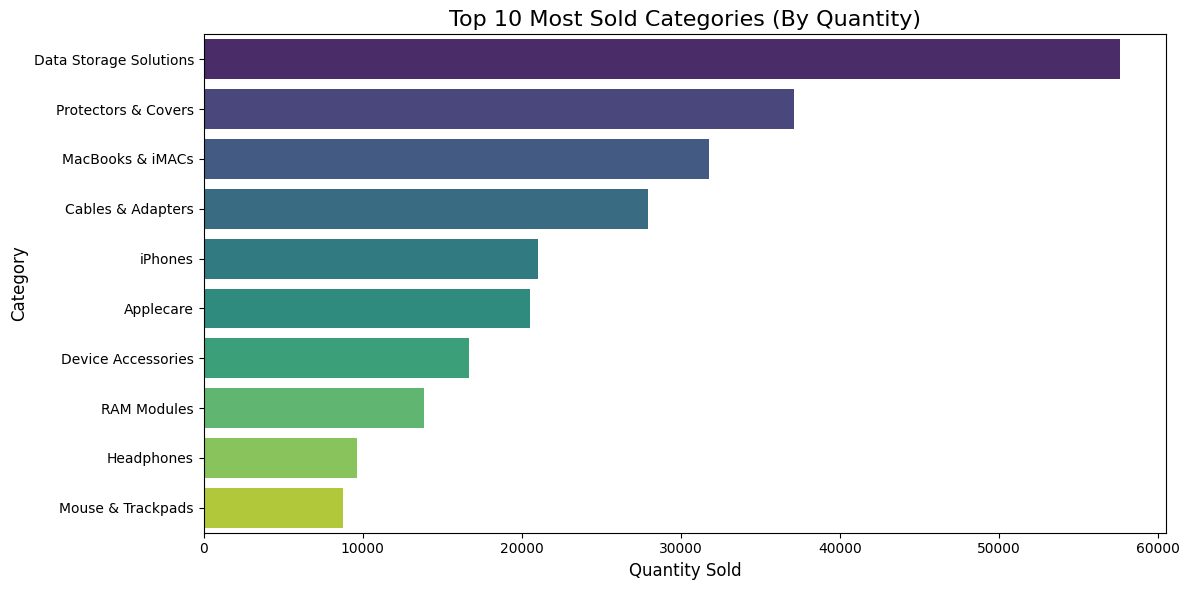

<ipython-input-11-e11c4988f556>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


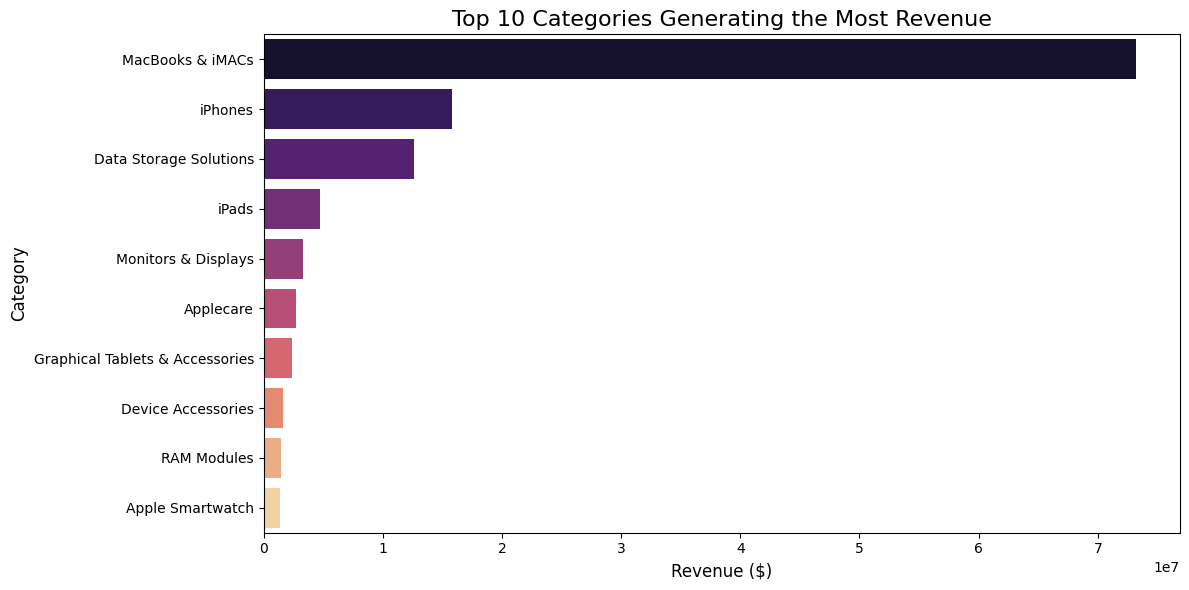

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram for most sold categories by quantity
plt.figure(figsize=(12, 6))
sns.barplot(
    data=most_sold_categories,
    x='product_quantity',
    y='category',
    palette='viridis'
)
plt.title("Top 10 Most Sold Categories (By Quantity)", fontsize=16)
plt.xlabel("Quantity Sold", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.tight_layout()
plt.show()

# Plot histogram for categories generating the most revenue
plt.figure(figsize=(12, 6))
sns.barplot(
    data=category_revenue,
    x='revenue',
    y='category',
    palette='magma'
)
plt.title("Top 10 Categories Generating the Most Revenue", fontsize=16)
plt.xlabel("Revenue ($)", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.tight_layout()
plt.show()

In [10]:
products_df['discount_status'] = products_df.apply(
    lambda row: 'Discounted' if row['promo_price'] < row['price'] else 'Non-Discounted',
    axis=1
)
products_df.head()

sku                                           name  \
0  RAI0007              Silver Rain Design mStand Support   
1  APP0023              Apple Mac Keyboard Keypad Spanish   
2  APP0025               Mighty Mouse Apple Mouse for Mac   
3  APP0072  Apple Dock to USB Cable iPhone and iPod white   
4  KIN0007    Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM   

                                                desc  price  promo_price  \
0       Aluminum support compatible with all MacBook  59.99        49.99   
1          USB ultrathin keyboard Apple Mac Spanish.  59.00        59.00   
2                             mouse Apple USB cable.  59.00        56.99   
3              IPhone dock and USB Cable Apple iPod.  25.00        23.00   
4  2GB RAM Mac mini and iMac (2006/07) MacBook Pr...  34.99        31.99   

   in_stock        type             category discount_status  
0         1      8696.0    Supports & Stands      Discounted  
1         0  13855401.0  Keyboards & Keypads  Non-Discounted  
2         0      1387.0    Mouse & Trackpads      Discounted  
3         0      1230.0    Cables & Adapters      Discounted  
4         1      1364.0          RAM Modules      Discounted

In [13]:
merged_data = pd.merge(orderlines_df, products_df, on='sku', how='left')
merged_data['revenue'] = merged_data['product_quantity'] * merged_data['unit_price']
discount_analysis = merged_data.groupby('discount_status').agg(
    total_quantity=('product_quantity', 'sum'),
    total_revenue=('revenue', 'sum')
).reset_index()

print(discount_analysis)

  discount_status  total_quantity  total_revenue
0      Discounted          298180   1.222605e+08
1  Non-Discounted           29695   6.193172e+06


<ipython-input-14-4a2755a1f3c0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_analysis, x='discount_status', y='total_quantity', palette='pastel')


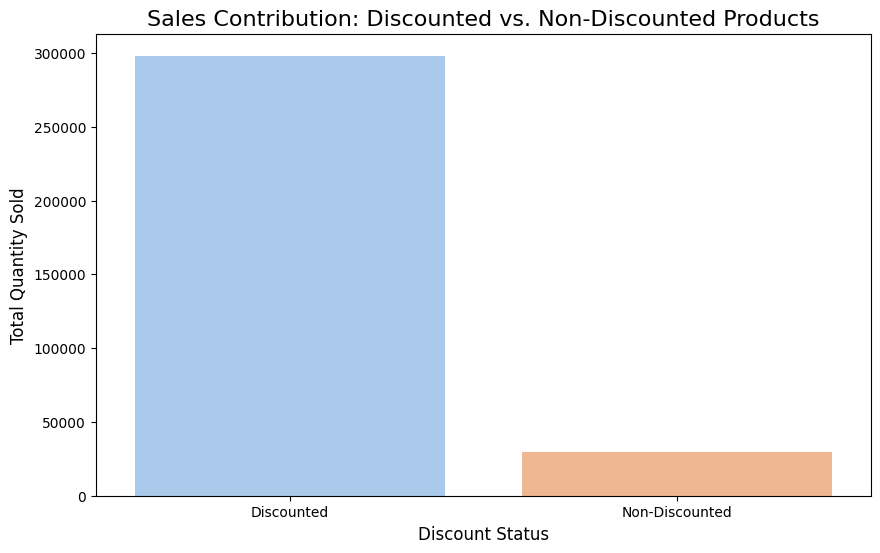

<ipython-input-14-4a2755a1f3c0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_analysis, x='discount_status', y='total_revenue', palette='muted')


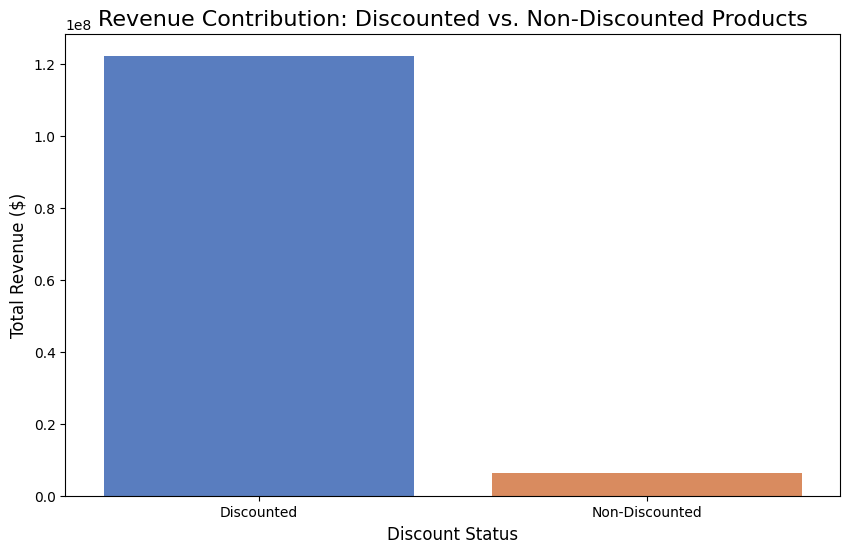

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sales contribution by discount status
plt.figure(figsize=(10, 6))
sns.barplot(data=discount_analysis, x='discount_status', y='total_quantity', palette='pastel')
plt.title("Sales Contribution: Discounted vs. Non-Discounted Products", fontsize=16)
plt.xlabel("Discount Status", fontsize=12)
plt.ylabel("Total Quantity Sold", fontsize=12)
plt.show()

# Plot revenue contribution by discount status
plt.figure(figsize=(10, 6))
sns.barplot(data=discount_analysis, x='discount_status', y='total_revenue', palette='muted')
plt.title("Revenue Contribution: Discounted vs. Non-Discounted Products", fontsize=16)
plt.xlabel("Discount Status", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.show()

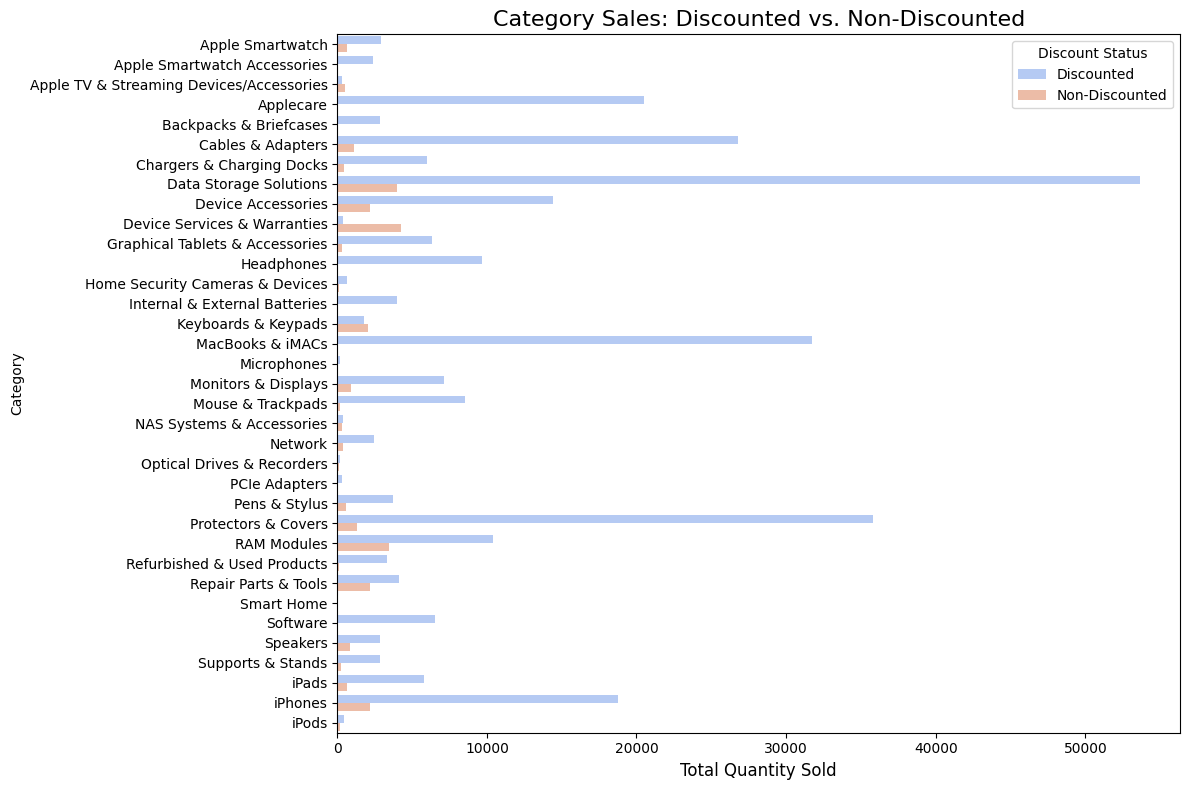

In [15]:
category_discount_analysis = merged_data .groupby(['category', 'discount_status']).agg(
    total_quantity=('product_quantity', 'sum'),
    total_revenue=('revenue', 'sum')
).reset_index()

# Visualize category-level impact
plt.figure(figsize=(12, 8))
sns.barplot(
    data=category_discount_analysis,
    x='total_quantity',
    y='category',
    hue='discount_status',
    palette='coolwarm'
)
plt.title("Category Sales: Discounted vs. Non-Discounted", fontsize=16)
plt.xlabel("Total Quantity Sold", fontsize=12)
plt.ylabel("Category", fontsize=10)
plt.legend(title="Discount Status")
plt.tight_layout()
plt.show()

In [16]:
final_df = pd.merge(merged_data, orders_df, on='order_id', how='left')

In [17]:
category_sales = final_df.groupby('category').agg({
    'product_quantity': 'sum',  # Total quantity sold
    'total_paid': 'sum'         # Total revenue
}).reset_index()

In [ ]:
top_products = final_df.groupby('name').agg({
    'product_quantity': 'sum',  # Total quantity sold
    'total_paid': 'sum'         # Total revenue
}).sort_values('product_quantity', ascending=False).reset_index()

In [ ]:
final_df['created_date'] = pd.to_datetime(final_df['created_date'])

# Extract year and month for grouping
final_df['month'] = final_df['created_date'].dt.to_period('M')

# Group by month to calculate monthly sales
monthly_sales = final_df.groupby('month').agg({
    'product_quantity': 'sum',
    'total_paid': 'sum'
}).reset_index()

In [18]:
orderlines_df['unit_price'].max()

159989.83

In [19]:
url = 'https://drive.google.com/file/d/1IOYlAO7P4Ca3nn1Xj2uIR1xyYeQTuwjf/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
merged_dataset_df = pd.read_csv(path)
merged_dataset_df = merged_dataset_df[merged_dataset_df['state'] == 'Completed']

In [ ]:
total_revenue = merged_dataset_df['total_paid'].sum()
total_revenue

25253127.909999996

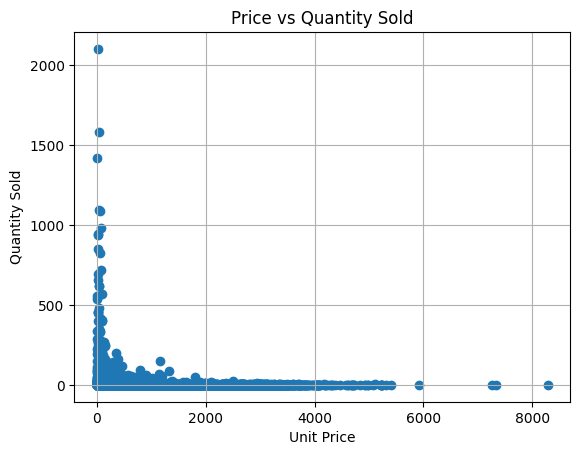

In [20]:
price_sensitivity = merged_dataset_df.groupby('unit_price').agg({
    'product_quantity': 'sum'
}).reset_index()

# Visualize the relationship
import matplotlib.pyplot as plt
plt.scatter(price_sensitivity['unit_price'], price_sensitivity['product_quantity'])
plt.title('Price vs Quantity Sold')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')
plt.grid()
plt.show()

In [23]:
merged_dataset_df = merged_dataset_df[merged_dataset_df['state'] == 'Completed']

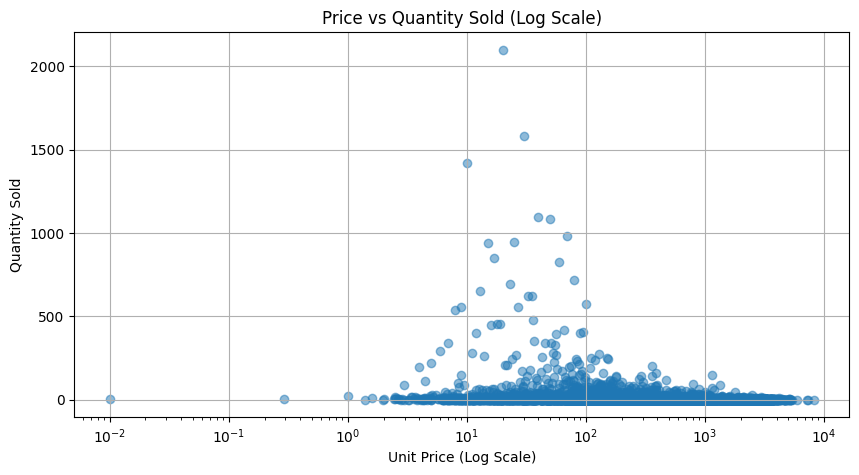

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(price_sensitivity['unit_price'], price_sensitivity['product_quantity'], alpha=0.5)

# Apply log scale to the X-axis
plt.xscale('log')

plt.title('Price vs Quantity Sold (Log Scale)')
plt.xlabel('Unit Price (Log Scale)')
plt.ylabel('Quantity Sold')
plt.grid()
plt.show()

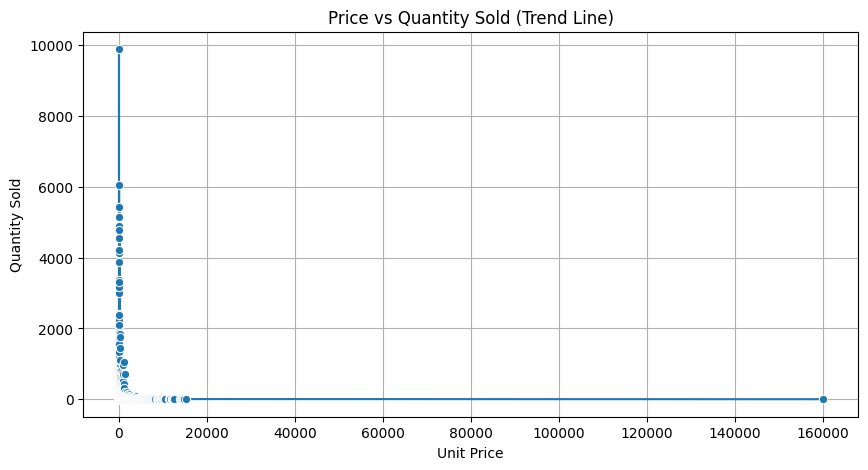

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(x='unit_price', y='product_quantity', data=price_sensitivity, marker='o')
plt.title('Price vs Quantity Sold (Trend Line)')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')
plt.grid()
plt.show()

In [ ]:
category_price_sensitivity = final_df.groupby(['category', 'unit_price']).agg({
    'product_quantity': 'sum'
}).reset_index()

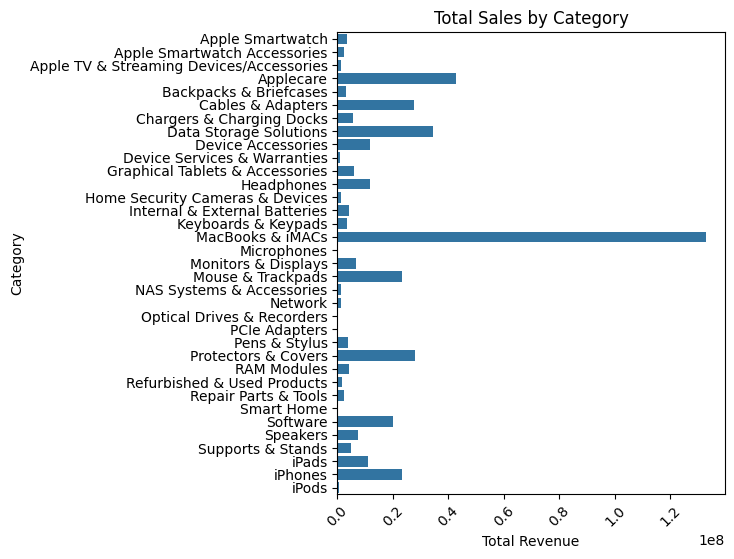

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,6))
sns.barplot(x='total_paid', y='category', data=category_sales)
plt.title('Total Sales by Category')
plt.xlabel('Total Revenue')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

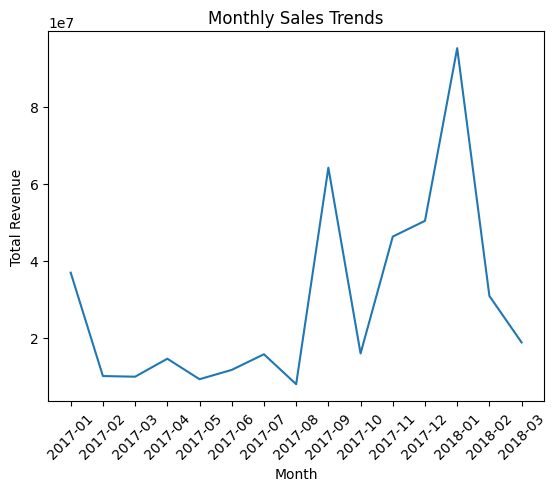

In [ ]:
plt.plot(monthly_sales['month'].astype(str), monthly_sales['total_paid'])
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [ ]:
url = 'https://drive.google.com/file/d/1IOYlAO7P4Ca3nn1Xj2uIR1xyYeQTuwjf/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
merged_dataset_df = pd.read_csv(path)

In [ ]:
merged_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                293983 non-null  int64  
 1   order_id          293983 non-null  int64  
 2   product_quantity  293983 non-null  int64  
 3   sku               293983 non-null  object 
 4   unit_price        293983 non-null  float64
 5   date              293983 non-null  object 
 6   name              292565 non-null  object 
 7   desc              292565 non-null  object 
 8   price             292565 non-null  float64
 9   promo_price       292565 non-null  float64
 10  in_stock          292565 non-null  float64
 11  type              267058 non-null  float64
 12  category          292565 non-null  object 
 13  created_date      293749 non-null  object 
 14  total_paid        293749 non-null  float64
 15  state             293749 non-null  object 
 16  short             29

<ipython-input-37-88bed57a4ea2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_paid", y="category", data=merged_dataset_df, palette=colors)


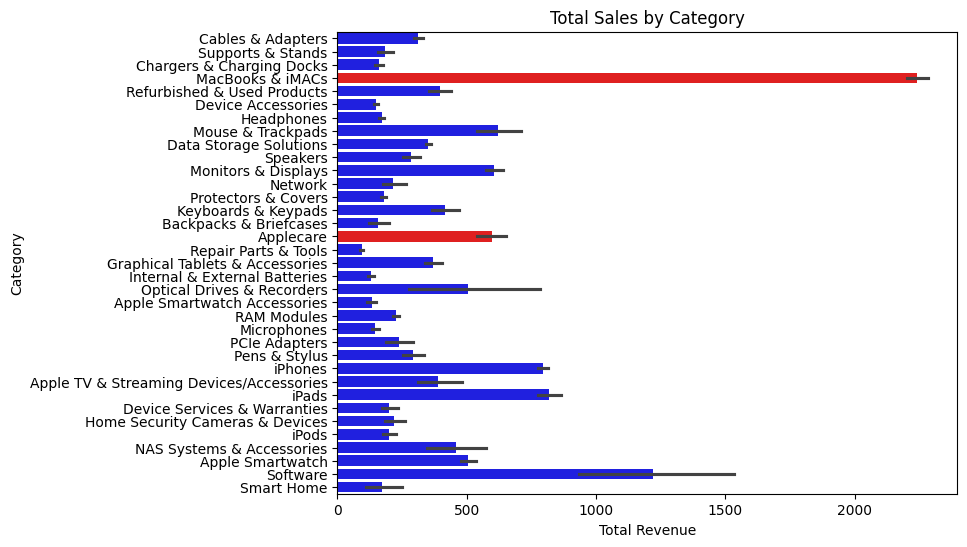

In [ ]:
merged_dataset_df = merged_dataset_df[merged_dataset_df['state'] == 'Completed']
highlight_categories = ["MacBooks & iMACs", "Applecare"
]

# Assign colors: Highlight key categories, others remain default
colors = ["red" if category in highlight_categories else "blue" for category in category_sales["category"]]

# Create figure
plt.figure(figsize=(8, 6))

# Create barplot with custom colors
sns.barplot(x="total_paid", y="category", data=merged_dataset_df, palette=colors)

# Titles and labels
plt.title("Total Sales by Category")
plt.xlabel("Total Revenue")
plt.ylabel("Category")

# Show plot
plt.show()

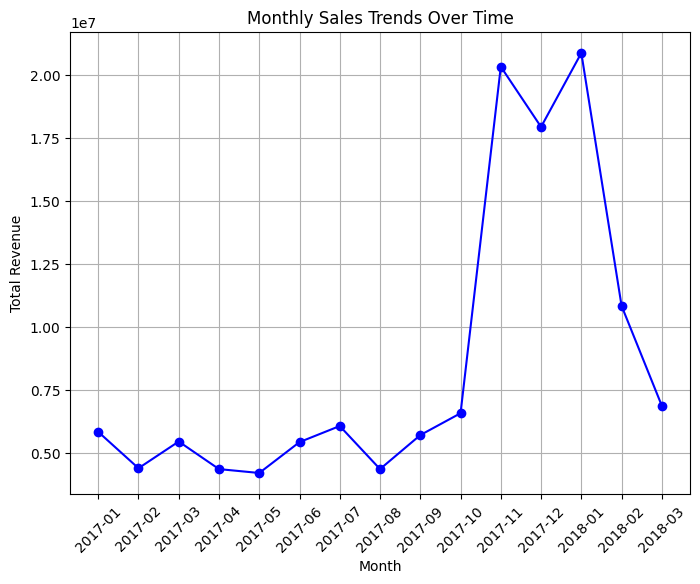

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert 'created_date' to datetime format
orders_df['created_date'] = pd.to_datetime(orders_df['created_date'])

# Extract year and month for grouping
orders_df['year_month'] = orders_df['created_date'].dt.to_period('M')

# Group by month to calculate total revenue
monthly_sales = orders_df.groupby('year_month').agg({
    'total_paid': 'sum'  # Summing up total revenue per month
}).reset_index()

# Convert 'year_month' to string for better plotting
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

# Plot the Monthly Sales Trends Line Chart
plt.figure(figsize=(8, 6))
plt.plot(monthly_sales['year_month'], monthly_sales['total_paid'], marker='o', linestyle='-', color='b')

# Chart Titles and Labels
plt.title('Monthly Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)

# Show plot
plt.show()

<ipython-input-26-fe5fbc2c32fa>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_quantity', y='name', data=best_selling_products, palette="Blues_r")


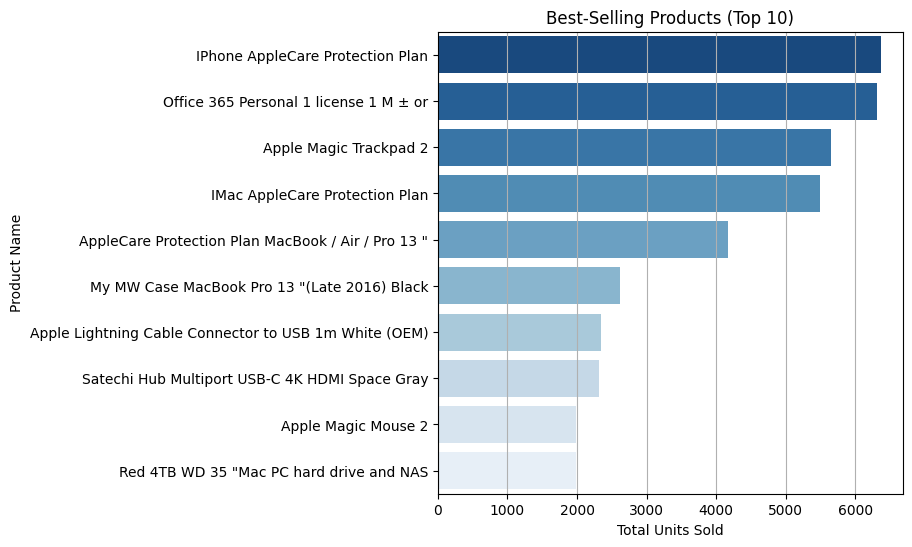

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Merge orderlines with products to get product names
merged_df = pd.merge(orderlines_df, products_df, on='sku', how='left')

# Group by product name and sum the product quantity to get total units sold
best_selling_products = merged_df.groupby('name').agg({
    'product_quantity': 'sum'
}).reset_index()

# Sort by highest quantity sold
best_selling_products = best_selling_products.sort_values(by='product_quantity', ascending=False).head(10)

# Plot the Best-Selling Products Bar Chart
plt.figure(figsize=(6, 6))
sns.barplot(x='product_quantity', y='name', data=best_selling_products, palette="Blues_r")

# Chart Titles and Labels
plt.title('Best-Selling Products (Top 10)')
plt.xlabel('Total Units Sold')
plt.ylabel('Product Name')  # Now showing actual product names instead of SKUs
plt.grid(axis='x')

# Show plot
plt.show()

<ipython-input-44-adf386280831>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_paid', y='name', data=revenue_generating_products, palette="Reds_r")


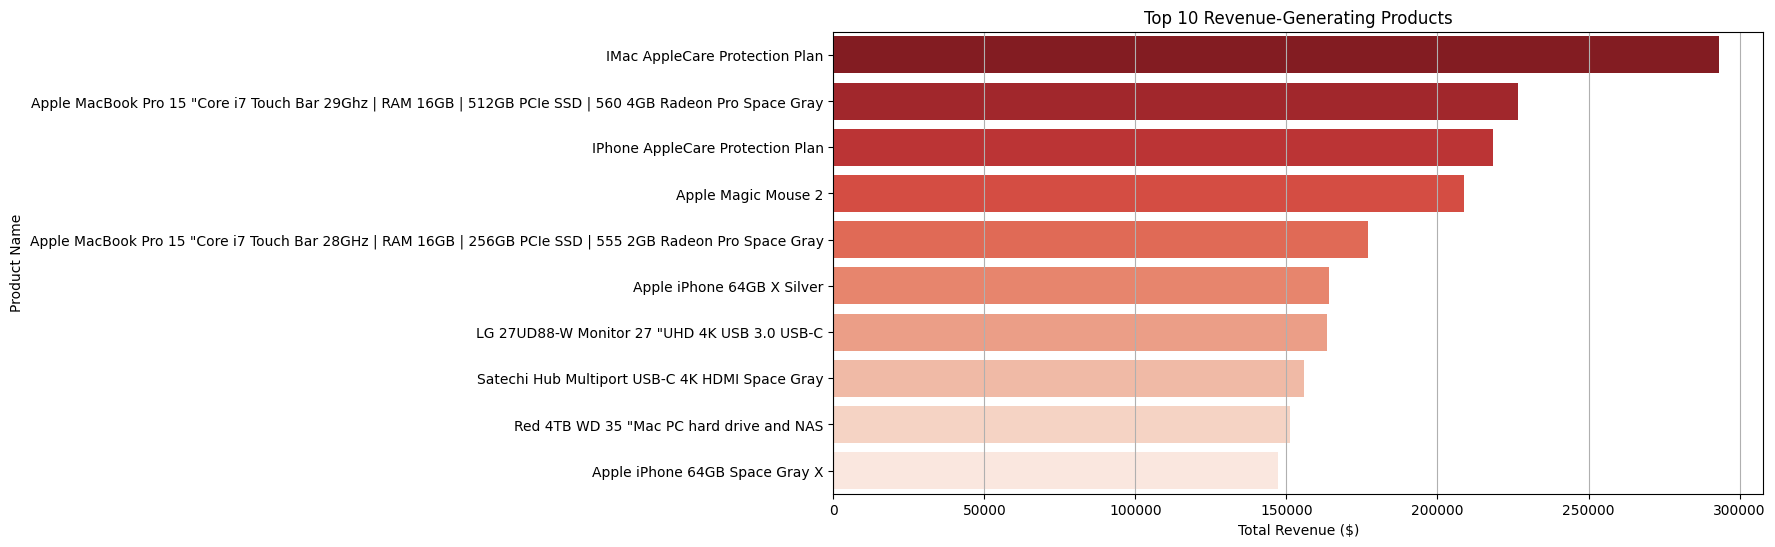

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Group by product name and sum the total revenue (unit price * quantity sold)
revenue_generating_products = merged_dataset_df.groupby('name').agg({
    'total_paid': 'sum'  # Summing total revenue per product
}).reset_index()

# Sort by highest revenue
revenue_generating_products = revenue_generating_products.sort_values(by='total_paid', ascending=False).head(10)

# Plot the Revenue-Generating Products Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='total_paid', y='name', data=revenue_generating_products, palette="Reds_r")

# Chart Titles and Labels
plt.title('Top 10 Revenue-Generating Products')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Product Name')  # Now showing actual product names instead of SKUs
plt.grid(axis='x')

# Show plot
plt.show()